In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 09 

In today's lecture, we will:
1. review functions and applying functions to tables by building a simple but sophisticated prediction function. 
2. we will introduce the group operation.


## Prediction

Can we predict how tall a child will grow based on the height of their parents?

To do this we will use the famous [Galton's height dataset](https://galton.org/essays/1880-1889/galton-1886-jaigi-regression-stature.pdf) that was collected to demonstrate the connection between parent's heights and the height of their children. 

In [2]:
families = Table.read_table('data/family_heights.csv')
families.group('family').sort('family', descending = True).show() 
# sort didn't work properly here --> data types matter!
# values stored in family column, were stored as strings NOT floats/int
# so sorting didn't work as we wanted it to
families.column('family')

family,count
99,8
98,1
97,10
96,5
95,3
94,2
93,4
92,2
91,3
90,7


array(['1', '1', '1', '1', '2', '2', '2', '2', '3', '3', '4', '4', '4',
       '4', '4', '5', '5', '5', '5', '5', '5', '6', '7', '7', '7', '7',
       '7', '7', '8', '8', '8', '9', '10', '11', '11', '11', '11', '11',
       '11', '11', '11', '12', '13', '13', '14', '14', '15', '15', '15',
       '16', '16', '16', '16', '16', '16', '16', '16', '16', '17', '17',
       '17', '17', '17', '17', '18', '18', '18', '19', '20', '20', '20',
       '20', '20', '20', '20', '20', '21', '21', '21', '22', '22', '22',
       '23', '23', '23', '23', '23', '23', '23', '24', '25', '25', '26',
       '26', '26', '26', '26', '27', '27', '27', '28', '28', '28', '28',
       '28', '28', '29', '29', '29', '30', '31', '31', '31', '31', '31',
       '31', '32', '32', '32', '32', '32', '33', '33', '33', '33', '33',
       '34', '35', '35', '35', '35', '35', '36', '36', '36', '36', '37',
       '37', '37', '37', '38', '38', '38', '38', '38', '38', '39', '39',
       '40', '40', '40', '40', '40', '41', '42', '42'

In [3]:
# future, we can go line by line and convert each entry in an array 
# and convert the string to a float/int
# requires some knowledge of for loops/iteration
type(families.column('family').item(0))

str

In [4]:
families

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


**Discussion:** This data was collected for Europeans living in the late 1800s.  What are some of the potential issues with this data?

### Exploring the Data

**Exercise:** Add a column `"parent average"` containing the average height of both parents.

In [5]:
parent_average = (families.column('father') + families.column('mother')) / 2
families = families.with_column('parent average', parent_average)
families

family,father,mother,child,children,order,sex,parent average
1,78.5,67,73.2,4,1,male,72.75
1,78.5,67,69.2,4,2,female,72.75
1,78.5,67,69,4,3,female,72.75
1,78.5,67,69,4,4,female,72.75
2,75.5,66.5,73.5,4,1,male,71
2,75.5,66.5,72.5,4,2,male,71
2,75.5,66.5,65.5,4,3,female,71
2,75.5,66.5,65.5,4,4,female,71
3,75,64,71,2,1,male,69.5
3,75,64,68,2,2,female,69.5


In [6]:
(78.5 + 67) / 2

72.75

In [7]:
(75.5 + 66.5 ) /2

71.0

<details> <summary>Click for Solution</summary>

```python
families = families.with_column(
    "parent average", (families.column('father') + families.column('mother'))/2.0
)
families
```
</details>

What is the relationship between a child's height and the average parent's height? 

**Exercise:** Make a scatter plot showing the relationship between the `"parent average"` and the `"child"` height.

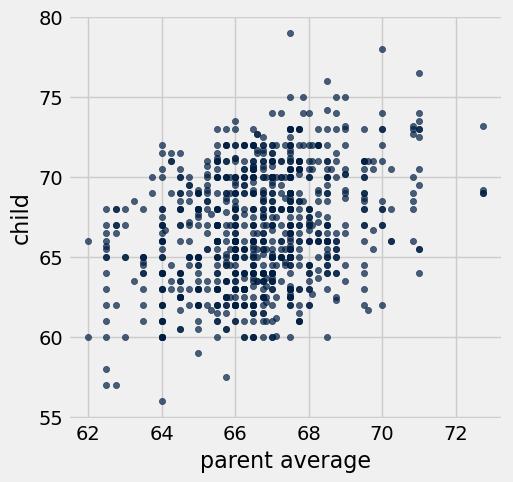

In [8]:
families.scatter('parent average', 'child')

<details> <summary>Click for Solution</summary> <br><br>
    
```python

families.scatter("parent average", "child")

```
    
<br><br></details>

**Questions:**
1. Do we observe a relationship between child and parent height?
2. Would a line plot help reveal that relationship? 
3. Could we learn something from a histogram?

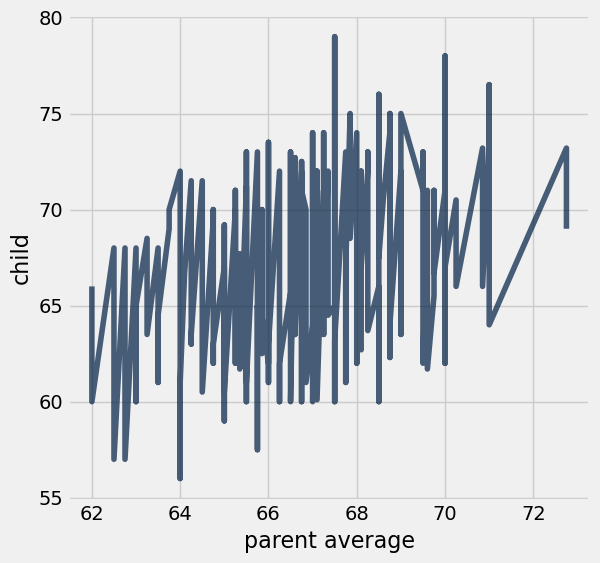

In [9]:
families.plot('parent average', 'child') # line plots not so great for showing correlation 
# great for showing sequential data, x-axis being time, distance

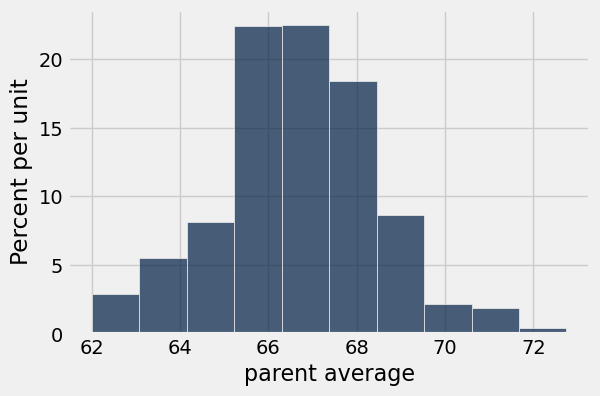

In [10]:
families.hist('parent average')
# average parent heights are normally distributed
# lots and lots of parents on average 65-69 inches tall (5'5" - 5'9")
# some as low on average 62" and some as tall as 72" on average

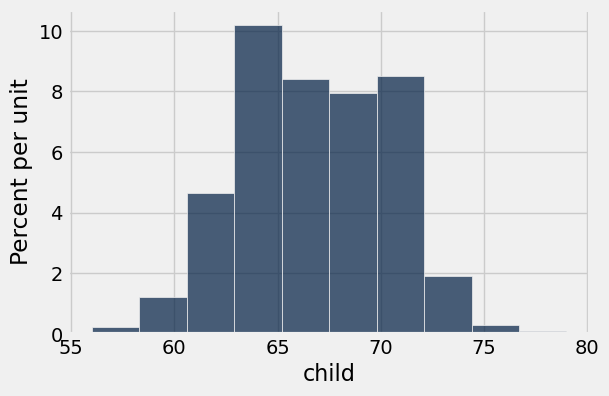

In [11]:
families.hist('child')
# lots of children between 62-70" -> 5'2" and 5'10"

### Making a Prediction

If we wanted to predict the height of a child given the height of the parents, we could look at the heigh of children with parents who have a similar average height. 


In [12]:
my_height = 5*12 + 3 # 5 ft 3 inches
spouse_height = 5*12 + 11 # 5 ft 11 inches

In [13]:
our_average = (my_height + spouse_height) / 2.0
our_average

67.0

Let's look at parents that are within 1 inch of our height.

In [14]:
window = 1 
lower_bound = our_average - window
upper_bound = our_average + window

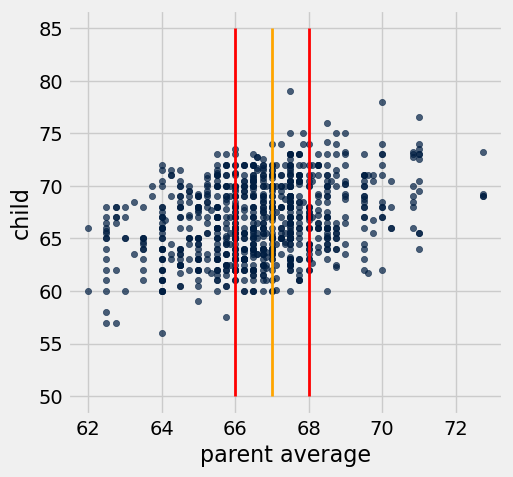

In [15]:
families.scatter('parent average', 'child')
# You don't need to know the details of this plotting code yet.
plots.plot([lower_bound, lower_bound], [50, 85], color='red', lw=2)
plots.plot([our_average, our_average], [50, 85], color='orange', lw=2);
plots.plot([upper_bound, upper_bound], [50, 85], color='red', lw=2);

**Exercise:** Create a function that takes an average of the parents heights and returns *an __array__ of all the children's heights* that are within the window of the parent's average height.

In [16]:
def similar_child_heights(parent_average):
    # find all points within red lines
    # find all child heights associated with average parent heights within +/- one inch from average parent height
    lower_bound = parent_average - window
    upper_bound = parent_average + window
    families_in_window = families.where('parent average', are.between_or_equal_to(lower_bound, upper_bound))
    #child_average = np.average(families_in_window.column('child'))
    # return array
    child_array = families_in_window.column('child')
    return child_array # child average

In [17]:
similar_child_heights(our_average)

array([ 72. ,  69. ,  68. ,  66.5,  62.5,  62.5,  74. ,  70. ,  68. ,
        67. ,  67. ,  66. ,  63.5,  63. ,  65. ,  66. ,  63. ,  70.5,
        70.5,  69. ,  65. ,  63. ,  69. ,  67. ,  63. ,  73. ,  67. ,
        70.5,  70. ,  66.5,  63. ,  67.5,  67.2,  66.7,  64. ,  71. ,
        70. ,  70. ,  66. ,  65. ,  65. ,  74. ,  72. ,  69. ,  67.5,
        63.5,  72. ,  71.5,  71.5,  70. ,  68. ,  65.7,  68. ,  68. ,
        62. ,  68. ,  68. ,  67.5,  66.5,  66.5,  66. ,  65.5,  65. ,
        68. ,  68. ,  68. ,  72. ,  71. ,  70. ,  66. ,  64.5,  64.5,
        62. ,  73. ,  62. ,  67.5,  64.5,  71. ,  67. ,  66. ,  65. ,
        63.5,  71. ,  70. ,  70. ,  64. ,  65. ,  65. ,  64. ,  63. ,
        63. ,  71. ,  71. ,  70. ,  63.5,  71. ,  70. ,  64.5,  62.5,
        61.5,  72. ,  70.5,  70.5,  64.5,  60. ,  70. ,  64. ,  64. ,
        64. ,  62.5,  70.5,  70. ,  69. ,  69. ,  66. ,  64.5,  64. ,
        62. ,  72. ,  70.2,  69. ,  68.5,  68. ,  65. ,  61.5,  61. ,
        61. ,  73. ,

In [18]:
lower_bound = our_average - window
upper_bound = our_average + window
families_in_window = families.where('parent average', are.between(lower_bound, upper_bound))
np.average(families_in_window.column('child'))

66.82838983050847

<details> <summary>Click for Solution</summary> <br><br>   

```python
def similar_child_heights(parent_average):
    lower_bound = parent_average - window
    upper_bound = parent_average + window
    return (
        families
            .where("parent average", are.between(lower_bound, upper_bound))
            .column("child")
    )
```

<br><br></details>

Testing the function:

In [19]:
# window = 1.0
similar_child_heights(our_average)

array([ 72. ,  69. ,  68. ,  66.5,  62.5,  62.5,  74. ,  70. ,  68. ,
        67. ,  67. ,  66. ,  63.5,  63. ,  65. ,  66. ,  63. ,  70.5,
        70.5,  69. ,  65. ,  63. ,  69. ,  67. ,  63. ,  73. ,  67. ,
        70.5,  70. ,  66.5,  63. ,  67.5,  67.2,  66.7,  64. ,  71. ,
        70. ,  70. ,  66. ,  65. ,  65. ,  74. ,  72. ,  69. ,  67.5,
        63.5,  72. ,  71.5,  71.5,  70. ,  68. ,  65.7,  68. ,  68. ,
        62. ,  68. ,  68. ,  67.5,  66.5,  66.5,  66. ,  65.5,  65. ,
        68. ,  68. ,  68. ,  72. ,  71. ,  70. ,  66. ,  64.5,  64.5,
        62. ,  73. ,  62. ,  67.5,  64.5,  71. ,  67. ,  66. ,  65. ,
        63.5,  71. ,  70. ,  70. ,  64. ,  65. ,  65. ,  64. ,  63. ,
        63. ,  71. ,  71. ,  70. ,  63.5,  71. ,  70. ,  64.5,  62.5,
        61.5,  72. ,  70.5,  70.5,  64.5,  60. ,  70. ,  64. ,  64. ,
        64. ,  62.5,  70.5,  70. ,  69. ,  69. ,  66. ,  64.5,  64. ,
        62. ,  72. ,  70.2,  69. ,  68.5,  68. ,  65. ,  61.5,  61. ,
        61. ,  73. ,

**Exercise:** Create a function to predict the child's height as the average of the height of children within the window of the average parent height.

In [20]:
def predict_child_height(parent_average):
    return np.average(similar_child_heights(parent_average)) 

<details> <summary>Click for Solution</summary> <br><br>   

```python
def predict_child_height(parent_average):
    return np.average(similar_child_heights(parent_average))
```

<br><br></details>

In [21]:
predict_child_height(our_average)

66.820800000000006

Let's plot the predicted height as well as the distribution of children's heights:

Mean: 66.8208


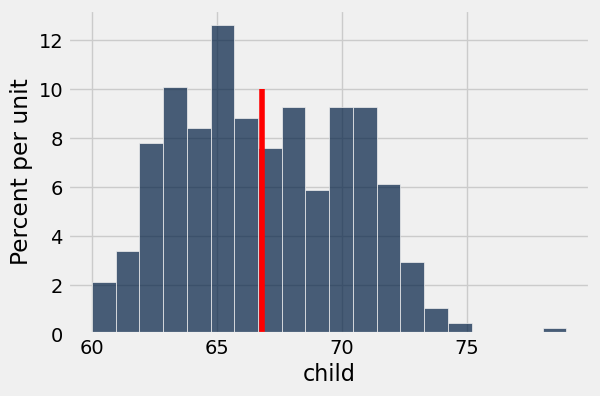

In [22]:
# window = 1.0
similar = similar_child_heights(our_average)
predicted_height = predict_child_height(our_average)

print("Mean:", predicted_height)
Table().with_column("child", similar).hist("child", bins=20) # histogram
plots.plot([predicted_height, predicted_height], [0, .1], color="red") # overlay graph onto histogram, to show red line

**Discussion:** Is this a good predictor? How would I know? What happens when I change window size?

Type here ... think about your response to the questions above
Is average parent height a good predictor for child's height in adulthood?
How do you know something is a good predictor? 
What do YOU define as "good", in terms of a good predictor?

### Evaluating the Predictions

To evaluate the predictions, let's see how the predictions compare to the actual heights of all the children in our dataset.  


**Exercise:** Apply the function (using `apply`) to all the parent averages in the table and save the result to the `"predicted"` column.

In [23]:
predicted_child_height_array = families.apply(predict_child_height, 'parent average') #generate array of predicted child height
families = families.with_column('predicted', predicted_child_height_array) # add array to families table
families

family,father,mother,child,children,order,sex,parent average,predicted
1,78.5,67,73.2,4,1,male,72.75,70.1
1,78.5,67,69.2,4,2,female,72.75,70.1
1,78.5,67,69,4,3,female,72.75,70.1
1,78.5,67,69,4,4,female,72.75,70.1
2,75.5,66.5,73.5,4,1,male,71,69.9971
2,75.5,66.5,72.5,4,2,male,71,69.9971
2,75.5,66.5,65.5,4,3,female,71,69.9971
2,75.5,66.5,65.5,4,4,female,71,69.9971
3,75,64,71,2,1,male,69.5,68.2092
3,75,64,68,2,2,female,69.5,68.2092


In [28]:
#this cell is the same as above
families = families.with_column(
    'predicted', families.apply(predict_child_height, 'parent average')
)

<details> <summary>Click for Solution</summary> <br><br>   

```python
# window = 0.5
families = families.with_column(
    "predicted", families.apply(predict_child_height, "parent average"))
families
```

<br><br></details>

**Exercise:** Construct a scatter plot with the `"parent average"` height on the x-axis and the `"child"` height and the `"predicted"` height on the y-axis. 

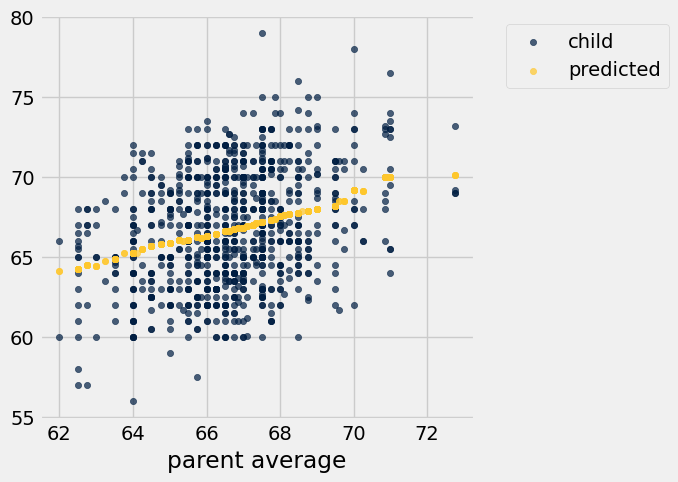

In [25]:
(
    families
    .select('parent average','child', 'predicted')
    .scatter('parent average')
)

<details> <summary>Click for Solution</summary> <br><br>   

```python
(
    families
    .select('parent average','child', 'predicted')
    .scatter('parent average')
)
```

<br><br></details>

**Discussion:** What do we see in this plot?  What trends.

**Exercise:** Define a function to compute the error (the difference) between the predicted value and the true value and apply that function to the table adding a column containing the `"error"`.  Then construct a histogram of the errors.


In [35]:
def error(predicted, true_value):
    # pass prevents any error in the cell when ran
    # but does not effectively do anything with our function, error
    return predicted - true_value

families = families.with_column("error", families.apply(error, "predicted", "child"))
families

family,father,mother,child,children,order,sex,parent average,predicted,error
1,78.5,67,73.2,4,1,male,72.75,70.1,-3.1
1,78.5,67,69.2,4,2,female,72.75,70.1,0.9
1,78.5,67,69,4,3,female,72.75,70.1,1.1
1,78.5,67,69,4,4,female,72.75,70.1,1.1
2,75.5,66.5,73.5,4,1,male,71,69.9971,-3.50286
2,75.5,66.5,72.5,4,2,male,71,69.9971,-2.50286
2,75.5,66.5,65.5,4,3,female,71,69.9971,4.49714
2,75.5,66.5,65.5,4,4,female,71,69.9971,4.49714
3,75,64,71,2,1,male,69.5,68.2092,-2.79083
3,75,64,68,2,2,female,69.5,68.2092,0.209174


In [31]:
Table.apply?

Signature: Table.apply(self, fn, *column_or_columns)
Docstring:
Apply ``fn`` to each element or elements of ``column_or_columns``.
If no ``column_or_columns`` provided, `fn`` is applied to each row.

Args:
    ``fn`` (function) -- The function to apply to each element
        of ``column_or_columns``.
    ``column_or_columns`` -- Columns containing the arguments to ``fn``
        as either column labels (``str``) or column indices (``int``).
        The number of columns must match the number of arguments
        that ``fn`` expects.

Raises:
    ``ValueError`` -- if  ``column_label`` is not an existing
        column in the table.
    ``TypeError`` -- if insufficient number of ``column_label`` passed
        to ``fn``.

Returns:
    An array consisting of results of applying ``fn`` to elements
    specified by ``column_label`` in each row.

>>> t = Table().with_columns(
...     'letter', make_array('a', 'b', 'c', 'z'),
...     'count',  make_array(9, 3, 3, 1),
...     'points', make_a

<details> <summary>Click for Solution</summary> <br><br>   

```python
def error(predicted, true_value):
    return predicted - true_value

families = families.with_column(
    "error", families.apply(error, "predicted", "child"))
families
```

<br><br></details>

Visualizing the distribution of the errors:

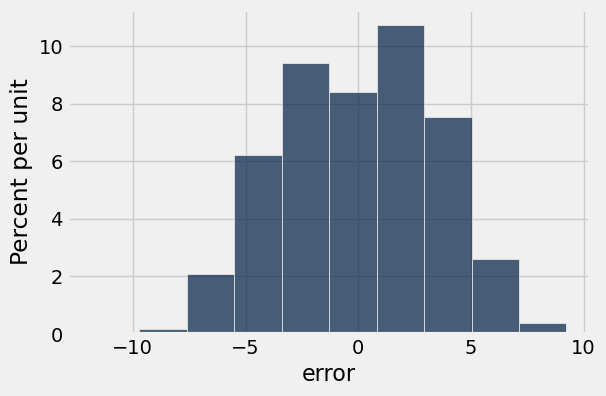

In [30]:
families.hist('error')

**Discussion:** Is this good?

In [ ]:
# write in your answer here
# are you satisfied with this amount of error?

### Split by female and male

**Exercise:** Overlay the histograms of the error for male and female children.

Hint: use the keyword argument `group` in hist()

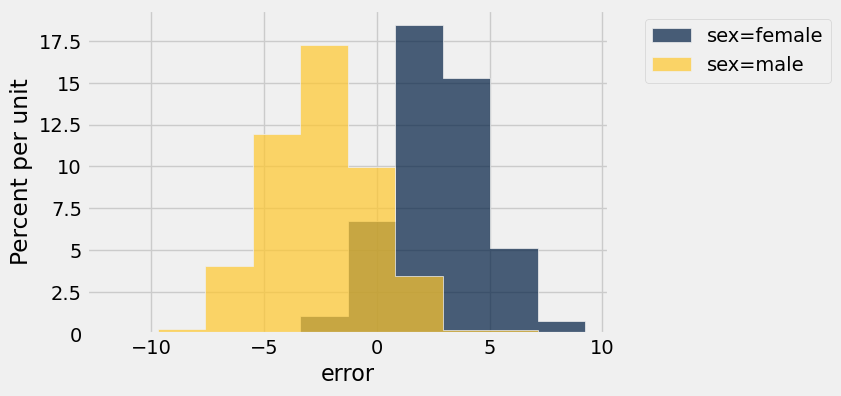

In [36]:
families.hist('error', group = 'sex')

<details> <summary>Click for Solution</summary> <br><br>   

```python
families.hist('error', group='sex')
```

<br><br></details>

**Discussion:** What do we observe?

### Building a Better Predictor

Based on what we observed, let's build a better predictor. 

**Exercise:** Implement a new height prediction function that considers averages the  height of children with the same sex and whose parents had a similar height.

*Hint:* Here is the previous function:
```python
def similar_child_heights(parent_average):
    lower_bound = parent_average - window
    upper_bound = parent_average + window
    return np.average(
        families
            .where("parent average", are.between(lower_bound, upper_bound))
            .column("child")
    )
```

In [42]:
def predict_child_height_with_sex(parent_average, sex):
    lower_bound = parent_average - window
    upper_bound = parent_average + window
    return np.average(
    families
    .where('sex', sex) # find all matching sex values - same sex for child
    .where('parent average', are.between(lower_bound, upper_bound)) # find window of parent average
    .column('child') # extract child height column as an array
          )

<details> <summary>Click for Solution</summary> <br><br>   

```python
def predict_child_height_with_sex(parent_average, sex):
    lower_bound = parent_average - window
    upper_bound = parent_average + window
    return np.average(
        families
        .where("sex", sex)
        .where("parent average", are.between(lower_bound, upper_bound))
        .column("child")
    )
```

<br><br></details>

Let's test it out.

In [43]:
predict_child_height_with_sex(our_average, "male")

69.413168724279842

In [44]:
predict_child_height_with_sex(our_average, "female")

64.085589519650668

**Exercise:** Apply the better predictor to the table and save the predictions in a column called `"predicted with sex"`.

In [45]:
predicted_with_sex = families.apply(predict_child_height_with_sex, "parent average", "sex")
families = families.with_column("predicted with sex", predicted_with_sex)
families

family,father,mother,child,children,order,sex,parent average,predicted,error,predicted with sex
1,78.5,67,73.2,4,1,male,72.75,70.1,-3.1,73.2
1,78.5,67,69.2,4,2,female,72.75,70.1,0.9,69.0667
1,78.5,67,69,4,3,female,72.75,70.1,1.1,69.0667
1,78.5,67,69,4,4,female,72.75,70.1,1.1,69.0667
2,75.5,66.5,73.5,4,1,male,71,69.9971,-3.50286,72.7882
2,75.5,66.5,72.5,4,2,male,71,69.9971,-2.50286,72.7882
2,75.5,66.5,65.5,4,3,female,71,69.9971,4.49714,67.3611
2,75.5,66.5,65.5,4,4,female,71,69.9971,4.49714,67.3611
3,75,64,71,2,1,male,69.5,68.2092,-2.79083,70.9566
3,75,64,68,2,2,female,69.5,68.2092,0.209174,65.6089


<details> <summary>Click for Solution</summary> <br><br>   

```python
families = families.with_column(
    "predicted with sex", families.apply(predict_child_height_with_sex, "parent average", "sex"))
families
```

<br><br></details>

**Exercise:** Construct a histogram of the new errors broken down by the sex of the child.

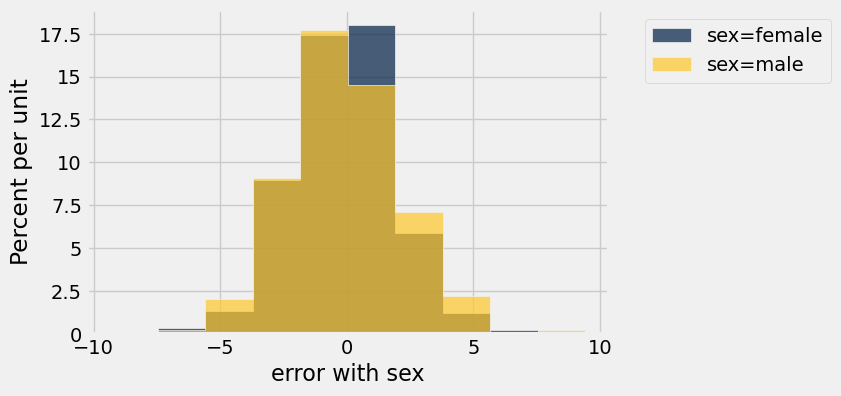

In [46]:
error_with_sex = families.apply(error, "predicted with sex", "child")
families = families.with_column("error with sex",  error_with_sex)

families.hist("error with sex", group="sex")

As a point of comparison

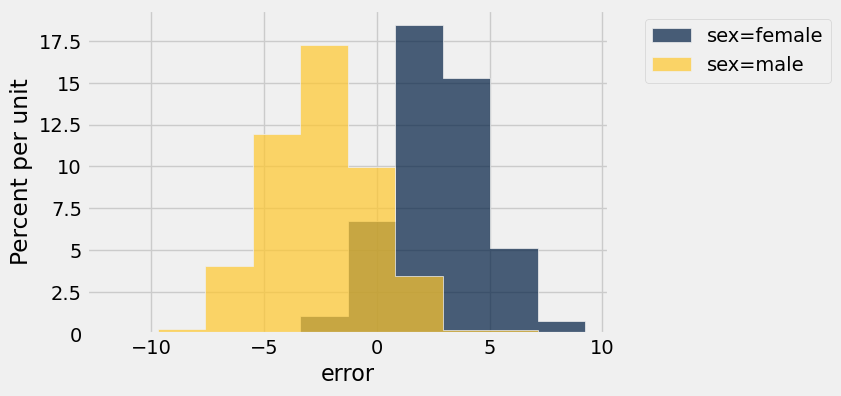

In [47]:
families.hist("error", group="sex")

---
<center> Return to slides <center>

---

## Grouping

For this part of the notebook we will use the following toy data:

In [ ]:
cones = Table.read_table('data/cones.csv')
cones

**Exercise:** Use the `group` function to determine the number of cones with each flavor.

<details> <summary>Click for Solution</summary> <br><br>   

```python
cones.group('Flavor')
```

<br><br></details>

**Exercise:** Use the `group` function to compute the average price of cones for each flavor.

<details> <summary>Click for Solution</summary> <br><br>   

```python
cones.group('Flavor', np.average)
 ```

<br><br></details>

**Exercise:** Use the `group` function to compute min price of cones for each flavor.

**Question**:
Why does color have a min?

<details> <summary>Click for Solution</summary> <br><br>   

```python
cones.group('Flavor', np.min)
```

<br><br></details>

What is really going on:

In [ ]:
cones

In [ ]:
def my_grp(grp):
    print(grp)
    return grp

cones.group("Flavor", my_grp)

In [ ]:
my_array = make_array(1,2,3)

In [ ]:
sum(my_array)

In [ ]:
sum?

In [ ]:
3 * 3

In [ ]:
3 * 'ha'

In [ ]:
3 * my_array

In [ ]:
round?


In [ ]:
round(my_array)

In [ ]:
round(my_array, 2)